In [68]:
import numpy as np
from scipy import linalg as la

#QR1 PROBLEM 1
def modifiedgs(A):
    A = A*1.0
    n = A.shape[1]
    Q = np.copy(A)
    R = np.zeros((n,n))
    for i in range(0,n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/float(R[i,i])
        for j in range(i+1, n):
            R[i][j] = (Q[:,j].T)@(Q[:,i])
            Q[:,j] = Q[:,j] - R[i][j]*(Q[:,i])
    return Q,R

A1 = np.matrix([[1., -1., 4.],[1, 4, -2],[1, 4, 2],[1, -1, 0]])
Q1,R1 = la.qr(A1, mode = "economic")
print("MY RESULT: ", modifiedgs(A1))
print("SCIPY'S RESULT: ", Q1,R1)

A2 = np.random.random((6,4))
Q2,R2 = la.qr(A2, mode = "economic")
print(A2.shape, Q2.shape, R2.shape)
print(np.allclose(np.triu(R2), R2), np.allclose(np.dot(Q2.T, Q2), np.identity(4)), np.allclose(np.dot(Q2, R2), A2))


MY RESULT:  (array([[ 0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5],
       [ 0.5, -0.5, -0.5]]), array([[ 2.,  3.,  2.],
       [ 0.,  5., -2.],
       [ 0.,  0.,  4.]]))
SCIPY'S RESULT:  [[-0.5  0.5 -0.5]
 [-0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5  0.5]] [[-2. -3. -2.]
 [ 0. -5.  2.]
 [ 0.  0. -4.]]
(6, 4) (6, 4) (4, 4)
True True True


In [69]:
#QR1 PROBLEM 2
def det(A):
    product = modifiedgs(A)[1][0,0]
    for i in range (1, len(A)):
        product = product * modifiedgs(A)[1][i,i]
    return abs(product)

A3 = np.random.random((3,3))
print(np.allclose(det(A3),abs(np.linalg.det(A3))))


True


In [70]:
#QR1 PROBLEM 3
def solver(A,b):
    Q = modifiedgs(A)[0]
    R = modifiedgs(A)[1]
    y = (Q.T)@b
    n = len(y)
    x = np.zeros((n,1))
    x[n-1] = y[n-1] / R[n-1, n-1]
    for row in range(n-2, -1, -1):
        sums = y[row]
        for j in range(row+1, n):
            sums = sums - R[row,j] * x[j]
        x[row] = sums / R[row,row]
    return x

b = np.array([1,2,3])
print(solver(A3,b))
print(np.linalg.solve(A3, b))

[[ 3.4330832 ]
 [-3.53484358]
 [ 3.80909985]]
[ 3.4330832  -3.53484358  3.80909985]


In [71]:
#QR1 PROBLEM 4
def fullqr(A):
    A = A*1.0
    sign = lambda x: 1 if x >= 0 else -1
    m = A.shape[0]
    n = A.shape[1]
    R = np.copy(A)
    Q = np.identity(m)
    for k in range(0, n):
        u = np.copy(R[k:,k])
        u[0] = u[0] + sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        R[k:,k:] = R[k:,k:] - 2 * np.outer(u, u.T) @ R[k:,k:]
        Q[k:,:] = Q[k:,:] - 2 * np.outer(u, u.T) @ Q[k:,:]
    return Q.T, R

print("MY RESULT: ", fullqr(A3))
print("SCIPY'S RESULT: ", la.qr(A3))

MY RESULT:  (array([[-0.31040123, -0.46259785,  0.83045428],
       [-0.23616056, -0.80869131, -0.53874536],
       [-0.9208036 ,  0.36334776, -0.14177141]]), array([[ -9.48742505e-01,  -5.50745145e-01,  -5.86705314e-01],
       [  0.00000000e+00,  -2.85325609e-01,  -5.24669517e-01],
       [  0.00000000e+00,  -2.77555756e-17,  -1.76511692e-01]]))
SCIPY'S RESULT:  (array([[-0.31040123, -0.46259785, -0.83045428],
       [-0.23616056, -0.80869131,  0.53874536],
       [-0.9208036 ,  0.36334776,  0.14177141]]), array([[-0.9487425 , -0.55074514, -0.58670531],
       [ 0.        , -0.28532561, -0.52466952],
       [ 0.        ,  0.        ,  0.17651169]]))


In [72]:
#QR1 PROBLEM 5
def hessenberg(A):
    A = A*1.0
    sign = lambda x: 1 if x >= 0 else -1
    m = A.shape[0]
    n = A.shape[1]
    H = np.copy(A)
    Q = np.identity(m)
    for k in range(0, n-2):
        u = np.copy(H[k+1:,k])
        u[0] = u[0] + sign(u[0])*la.norm(u)
        u = u/(la.norm(u))
        H[k+1:,k:] = H[k+1:,k:] - (2 * np.outer(u, u.T) @ H[k+1:,k:])
        H[:, k+1:] = H[:, k+1:] - (2 * H[:, k+1:] @ np.outer(u, u.T))
        Q[k+1:, :] = Q[k+1:, :] - (2 * np.outer(u, u.T) @ Q[k+1:, :])
    return H, Q.T

A4 = np.matrix([[1., 2., 3.],[0, 1, 4],[5, 6, 0]])
print("MY RESULT FOR H: ", hessenberg(A4)[0].round(2))
print("SCIPY'S RESULT FOR Q.T: ", la.hessenberg(A4, calc_q = True)[0].round(2))
print("MY RESULT FOR H: ", hessenberg(A4)[1].round(2))
print("SCIPY'S RESULT FOR Q.T: ", la.hessenberg(A4, calc_q = True)[1].round(2))


MY RESULT FOR H:  [[ 1. -3. -2.]
 [-5. -0.  6.]
 [ 0.  4.  1.]]
SCIPY'S RESULT FOR Q.T:  [[ 1. -3. -2.]
 [-5.  0.  6.]
 [ 0.  4.  1.]]
MY RESULT FOR H:  [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0. -1.  0.]]
SCIPY'S RESULT FOR Q.T:  [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0. -1.  0.]]


In [73]:
#QR2 PROBLEM 1
def solver2(A,b):
    Q, R = la.qr(A, mode = "economic")
    return la.solve_triangular(R, (Q.T) @ b)

A5 = np.matrix([[1., 2., 3.],[0, 1, 4],[5, 6, 0], [3, 9, -1], [4, 0, 0]])
b = np.array([1, 4, 2, 3, -4])
print("MY SOLUTION: ", solver2(A5, b))
print("NUMPY'S SOLUTION: ", np.linalg.lstsq(A5,b)[0])


MY SOLUTION:  [-0.77795408  0.74026539  0.58691287]
NUMPY'S SOLUTION:  [-0.77795408  0.74026539  0.58691287]


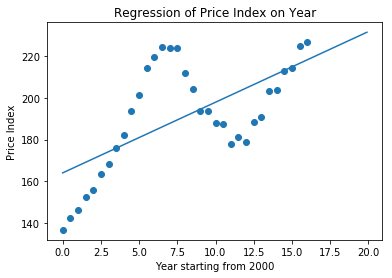

In [74]:
#QR2 PROBLEM 2
from matplotlib import pyplot as plt

def f(x, xhat):
    return xhat[0]*x + xhat[1]

def housing(A,b):
    housing = np.load("housing.npy")
    A = housing[:,0].reshape(len(housing),1)
    ones = np.ones((len(housing), 1))
    A = np.hstack((A,ones))
    b = housing[:,1].reshape(len(housing),1)
    xhat = solver2(A,b)
    plt.scatter(A[:, 0], b)
    x = np.arange(0,20,0.1)
    plt.plot(x, f(x, xhat))
    plt.title("Regression of Price Index on Year")
    plt.xlabel("Year starting from 2000")
    plt.ylabel("Price Index")
    plt.show()
    return

housing(A5,b)


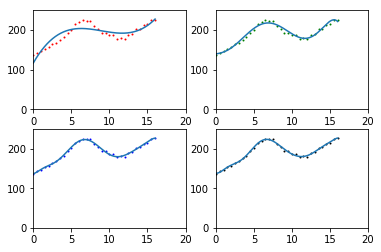

MY XHAT3:  
 [[   0.15]
 [  -4.13]
 [  33.78]
 [ 116.92]] 
 NUMPY'S XHAT3:  
 [[   0.15]
 [  -4.13]
 [  33.78]
 [ 116.92]]
MY XHAT6:  
 [[ -0.00000000e+00]
 [  3.00000000e-02]
 [ -3.40000000e-01]
 [  1.43000000e+00]
 [  4.30000000e-01]
 [  3.31000000e+00]
 [  1.39740000e+02]] 
 NUMPY'S XHAT6:  
 [[ -0.00000000e+00]
 [  3.00000000e-02]
 [ -3.40000000e-01]
 [  1.43000000e+00]
 [  4.30000000e-01]
 [  3.31000000e+00]
 [  1.39740000e+02]]
MY XHAT9:  
 [[ -0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e-02]
 [  1.30000000e-01]
 [ -1.20000000e+00]
 [  6.04000000e+00]
 [ -1.56500000e+01]
 [  1.86800000e+01]
 [  2.46000000e+00]
 [  1.37170000e+02]] 
 NUMPY'S XHAT9:  
 [[ -0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e-02]
 [  1.30000000e-01]
 [ -1.20000000e+00]
 [  6.04000000e+00]
 [ -1.56500000e+01]
 [  1.86800000e+01]
 [  2.46000000e+00]
 [  1.37170000e+02]]
MY XHAT12:  
 [[ -0.00000000e+00]
 [  0.00000000e+00]
 [ -0.00000000e+00]
 [  0.00000000e+00]
 [ -2.00000000e-02]
 [  2.4000000

In [75]:
def f3(x, xhat):
    return xhat[0]*(x**3) + xhat[1]*(x**2) + xhat[2]*(x**1) + xhat[3]

def f6(x, xhat):
    return xhat[0]*(x**6) + xhat[1]*(x**5) + xhat[2]*(x**4) + xhat[3]*(x**3) + xhat[4]*(x**2) + xhat[5]*x + xhat[6]

def f9(x, xhat):
    return xhat[0]*(x**9) + xhat[1]*(x**8) + xhat[2]*(x**7) + xhat[3]*(x**6) + xhat[4]*(x**5) + xhat[5]*(x**4) + xhat[6]*(x**3) + xhat[7]*(x**2) + xhat[8]*x + xhat[9]

def f12(x, xhat):
    return xhat[0]*(x**12) + xhat[1]*(x**11) + xhat[2]*(x**10) + xhat[3]*(x**9) + xhat[4]*(x**8) + xhat[5]*(x**7) + xhat[6]*(x**6) + xhat[7]*(x**5) + xhat[8]*(x**4) + xhat[9]*(x**3) + xhat[10]*(x**2) + xhat[11]*(x**1)+ xhat[12]

def housingpoly(A,b):
    housing = np.load("housing.npy")
    A = housing[:,0].reshape(len(housing),1)
    ones = np.ones((len(housing), 1))
    A = np.hstack((A,ones))
    b = housing[:,1].reshape(len(housing),1)

    A3 = np.vander(A[:, 0], 4)
    xhat3 = la.lstsq(A3,b)[0]

    A6 = np.vander(A[:, 0], 7)
    xhat6 = la.lstsq(A6,b)[0]

    A9 = np.vander(A[:, 0], 10)
    xhat9 = la.lstsq(A9,b)[0]

    A12 = np.vander(A[:, 0], 13)
    xhat12 = la.lstsq(A12,b)[0]

    x = np.linspace(0.0,16,10000)

    plt.subplot(221)
    plt.scatter(A[:, 0], b, s = 1, c = 'r')
    plt.plot(x, f3(x, xhat3))
    plt.xlim([0,20])
    plt.ylim([0,250])

    plt.subplot(222)
    plt.scatter(A[:, 0], b, s = 1, c = 'g')
    plt.plot(x, f6(x, xhat6))
    plt.xlim([0,20])
    plt.ylim([0,250])

    plt.subplot(223)
    plt.scatter(A[:, 0], b, s = 1 , c = 'b')
    plt.plot(x, f9(x, xhat9))
    plt.xlim([0,20])
    plt.ylim([0,250])

    plt.subplot(224)
    plt.scatter(A[:, 0], b, s = 1, c = 'k')
    plt.plot(x, f12(x, xhat12))
    plt.xlim([0,20])
    plt.ylim([0,250])


    plt.show()


    print("MY XHAT3: ", '\n',np.around(xhat3, 2), '\n', "NUMPY'S XHAT3: ", '\n',np.around(np.polyfit(A[:,0],b, 3),2))
    print("MY XHAT6: ", '\n',np.around(xhat6, 2),'\n', "NUMPY'S XHAT6: ", '\n',np.around(np.polyfit(A[:,0],b, 6),2))
    print("MY XHAT9: ", '\n',np.around(xhat9, 2), '\n',"NUMPY'S XHAT9: ", '\n',np.around(np.polyfit(A[:,0],b, 9),2))
    print("MY XHAT12: ", '\n',np.around(xhat12, 2), '\n',"NUMPY'S XHAT12: ", '\n',np.around(np.polyfit(A[:,0],b, 12),2))

    return

housingpoly(A5,b)

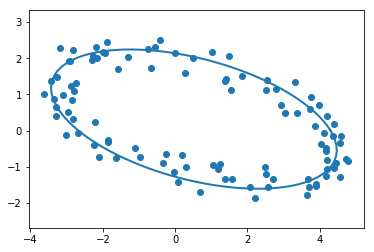

In [76]:
#QR2 PROBLEM 4
def ellipse():
    ellipse = np.load("ellipse.npy")
    c1 = np.square(ellipse[:,0].reshape(len(ellipse),1))
    c2 = ellipse[:,0].reshape(len(ellipse),1)
    c3 = ellipse[:,0].reshape(len(ellipse),1)*ellipse[:,1].reshape(len(ellipse),1)
    c4 = ellipse[:,1].reshape(len(ellipse),1)
    c5 = np.square(ellipse[:,1].reshape(len(ellipse),1))
    A = np.hstack((c1,c2,c3,c4,c5))
    b = np.ones((len(ellipse), 1))
    xhat = la.lstsq(A,b)[0]
    return xhat

xhat = ellipse()

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    ellipse = np.load("ellipse.npy")
    plt.scatter(ellipse[:, 0], ellipse[:, 1])
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")
    plt.show()

plot_ellipse(xhat[0], xhat[1], xhat[2], xhat[3], xhat[4])


In [77]:
#QR2 PROBLEM 5
def dominant(A,N,tol):
    m = A.shape[0]
    n = A.shape[1]
    x = np.random.random((n,1))
    x = x/la.norm(x)
    diff = 1
    k = 0
    while ((diff > tol) & (k < N)):
        xnew = (A @ x)
        xnew = xnew/la.norm(xnew)
        diff = la.norm(xnew - x)
        x = xnew.copy()
        del(xnew)
        k = k + 1

    return x.T @ A @ x, x

A6 = np.matrix([[1., 2., 3.],[4., 2., 1.],[7., 6., 9.]])
print("SCIPY'S EIGENVALUES: ", la.eig(A6)[0])
print("MY EIGENVALUES: ", dominant(A6, 3, 1e-5)[0])


SCIPY'S EIGENVALUES:  [ 12.38025229+0.j  -1.34274435+0.j   0.96249206+0.j]
MY EIGENVALUES:  [[ 12.38311705]]


In [78]:
#QR2 PROBLEM 6
def alleigen(A, N, tol):
    m = A.shape[0]
    n = A.shape[1]
    S = la.hessenberg(A)
    for k in range(0,N):
        Q, R = la.qr(S)
        S = R @ Q
    eigs = []
    i = 0
    while i < n:
        if i == n-1:
            eigs.append(S[i,i])
        elif abs(S[i+1,i]) < tol:
            eigs.append(S[i,i])
        else:
            x1 = (- S[i,i+1] + cmath.sqrt(S[i,i+1]**2) - 4*S[i,i]*S[i+1,i])/(2*S[i,i])
            x2 = (- S[i,i+1] - cmath.sqrt(S[i,i+1]**2) - 4*S[i,i]*S[i+1,i])/(2*S[i,i])
            eigs.append(x1)
            eigs.append(x2)
            i = i + 1
        i = i + 1
    return eigs

A7 = A6 + A6.T
print("SCIPY'S EIGENVALUES: ", la.eig(A7)[0])
print("MY EIGENVALUES: ", alleigen(A7,50,1e-5))


SCIPY'S EIGENVALUES:  [ 26.38261425+0.j  -3.94078345+0.j   1.55816920+0.j]
MY EIGENVALUES:  [26.382614247443492, -3.9407834506366597, 1.5581692031931644]


In [79]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

#SVD PROBLEM 1
def truncated_svd(A, k = None):
    m, n = A.shape
    Aconj = np.conj(A)
    Aherm = Aconj.T
    AhA = Aherm @ A
    eigenvalues, eigenvectors = la.eig(AhA)
    singular = np.sqrt(eigenvalues)
    eigenvectors = eigenvectors.T
    mat = np.vstack((singular, eigenvectors))
    mat[mat[0,:].argsort()[::-1]]

    if k == None:
        indices = [i for (i,v) in enumerate(mat[0]) if v==0]
        mat = np.delete(mat, indices, 1)
        firstrow = mat[0,:]
        S = np.diag(firstrow)
        firstrowrecip = np.reciprocal(firstrow)
        V = mat[1:, :]
        U = A @ V
        for i in range(0, len(U)):
            U[:,i] = firstrowrecip[i]*U[:,i]

    elif isinstance(k, int) == True:
        mat = mat[:, 0:k-1]
        S = np.diag(np.diag(mat[0,:]))
        firstrowrecip = np.reciprocal(firstrow)
        V = mat[1:, :]
        U = A @ V
        for i in range(0, len(U)):
            U[:,i] = firstrowrecip[i]*U[:,i]

    return U, S, V

A7 = np.matrix([[1., 2., 3.],[4., 2., 1.],[7., 6., 9.]])

print("U: ", '\n', truncated_svd(A7)[0], '\n')
print("S: ", '\n', truncated_svd(A7)[1], '\n')
print("V: ", '\n', truncated_svd(A7)[2], '\n')
print("Estimated A: ", '\n', truncated_svd(A7)[0] @ truncated_svd(A7)[1] @ np.conj(truncated_svd(A7)[2].T))
print("Actual A: ", '\n', A7)

U:  
 [[-0.08312943+0.j -1.15071985+0.j  4.00651057+0.j]
 [-0.24981651+0.j -1.02933492+0.j -2.47342793+0.j]
 [-0.41178125+0.j -4.15268603+0.j  5.64644364+0.j]] 

S:  
 [[ 13.90783184+0.j   0.00000000+0.j   0.00000000+0.j]
 [  0.00000000+0.j   2.71904374+0.j   0.00000000+0.j]
 [  0.00000000+0.j   0.00000000+0.j   0.42310130+0.j]] 

V:  
 [[-0.56463344+0.j -0.47619053+0.j -0.67411546+0.j]
 [-0.76402496+0.j -0.00736663+0.j  0.64514463+0.j]
 [ 0.31217772+0.j -0.87931127+0.j  0.35966201+0.j]] 

Estimated A:  
 [[ 1.+0.j  2.+0.j  3.+0.j]
 [ 4.+0.j  2.+0.j  1.+0.j]
 [ 7.+0.j  6.+0.j  9.+0.j]]
Actual A:  
 [[ 1.  2.  3.]
 [ 4.  2.  1.]
 [ 7.  6.  9.]]


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(2, 1000) (1, 1000) (1, 1000)


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


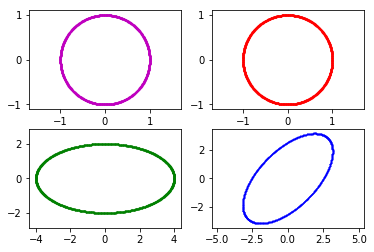

In [80]:
#SVD PROBLEM 2A
def circle():
    x = np.array([])
    y = np.array([])

    angle = np.linspace(0, np.pi*2, 1000)
    x = np.cos(np.copy(angle))
    y = np.sin(np.copy(angle))
    return x,y

def transformations():
    A = np.matrix([[3,1],[1,3]])
    x = circle()[0].reshape(1,1000)
    y = circle()[1].reshape(1,1000)
    S = np.vstack((x,y))

    U = truncated_svd(A)[0]
    Sigma = truncated_svd(A)[1]
    V = truncated_svd(A)[2]
    Vherm = (np.conj(V)).T

    plt.subplot(221)
    plt.scatter(x,y, s =1, c = 'm')
    plt.axis("equal")

    plt.subplot(222)
    new2 = Vherm @ S
    plt.scatter(new2[0,:], new2[1,:], s = 1, c = 'r')
    plt.axis("equal")

    plt.subplot(223)
    new3 = Sigma @ Vherm @ S
    plt.scatter(new3[0,:], new3[1,:], s = 1, c = 'g')
    plt.axis("equal")

    
    new4 = U @ new3
    n1 = new4[0,:]
    n2 = new4[1,:]
    print(np.shape(new4),np.shape(n1),np.shape(n2))
    
    plt.subplot(224)
    plt.plot(n1, n2, ".",color="blue",markersize=1)
    plt.axis("equal")

    plt.show()

transformations()


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


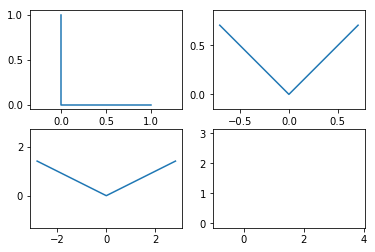

In [81]:
#SVD PROBLEM 2B

def transformations():
    A = np.matrix([[3,1],[1,3]])
    x = np.array([1,0,0])
    y = np.array([0,0,1])
    S = np.vstack((x,y))

    U = truncated_svd(A)[0]
    Sigma = truncated_svd(A)[1]
    V = truncated_svd(A)[2]
    Vherm = (np.conj(V)).T

    plt.subplot(221)
    plt.plot(x,y)
    plt.axis("equal")

    plt.subplot(222)
    new2 = Vherm @ S
    plt.plot(new2[0,:], new2[1,:])
    plt.axis("equal")

    plt.subplot(223)
    new3 = Sigma @ Vherm @ S
    plt.plot(new3[0,:], new3[1,:])
    plt.axis("equal")

    new4 = U @ new3
    n1 = new4[0,:]
    n2 = new4[1,:]
    
    plt.subplot(224)
    plt.plot(n1, n2)
    plt.axis("equal")

    plt.show()

transformations()

In [82]:
#SVD PROBLEM 3
def svd_approx(A, k):
    U, s, Vh = la.svd(A, full_matrices = False)
    S = np.diag(s[:k])
    Ahat = U[:, :k].dot(S).dot(Vh[:k,:])
    return Ahat

print(svd_approx(A7, 2))
print(svd_approx(A7, 3))

[[ 1.11471245  1.67688935  3.13216097]
 [ 4.04690459  1.8678838   1.05403908]
 [ 6.95431762  6.1286736   8.94736903]]
[[ 1.  2.  3.]
 [ 4.  2.  1.]
 [ 7.  6.  9.]]


In [83]:
#SVD PROBLEM 4
def lowest_rank_approx(A, e):
    U, s, Vh = la.svd(A, full_matrices = False)
    k = 1
    S = np.diag(s[:k])
    Ahat = U[:, :k].dot(S).dot(Vh[:k,:])

    while (la.norm(A-Ahat) < e):
        k = k + 1
        S = np.diag(s[:k])
        Ahat = U[:, :k].dot(S).dot(Vh[:k,:])

    return Ahat

A8 = np.random.random((6,6))
print(lowest_rank_approx(A8, 1e-5))

[[ 0.73817753  0.61864204  0.67634241  0.42184784  0.76980607  0.347958  ]
 [ 0.57249596  0.47978982  0.52453953  0.32716545  0.59702557  0.26985995]
 [ 0.64154128  0.53765442  0.58780112  0.36662293  0.66902927  0.30240615]
 [ 0.44094872  0.36954446  0.40401165  0.25198988  0.45984196  0.20785195]
 [ 0.74677695  0.62584893  0.68422149  0.42676217  0.77877395  0.35201155]
 [ 0.67208197  0.56324955  0.6157835   0.38407607  0.70087853  0.31680224]]


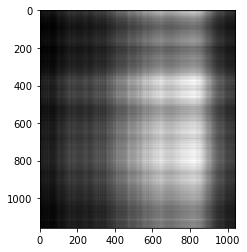

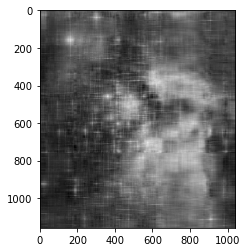

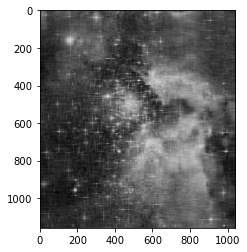

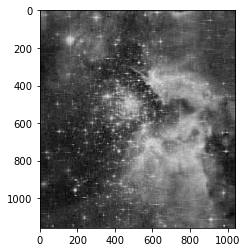

In [84]:
#SVD PROBLEM 5
def compress_img(filename, k):
    X = plt.imread(filename)[:,:,0].astype(float)
    plt.imshow(svd_approx(X,k), cmap="gray")
    plt.show()

compress_img('/Users/benjaminlim/Documents/BootCamp2017/Labs/Computation/Week 3/hubble.jpg', 1)
compress_img('/Users/benjaminlim/Documents/BootCamp2017/Labs/Computation/Week 3/hubble.jpg', 14)
compress_img('/Users/benjaminlim/Documents/BootCamp2017/Labs/Computation/Week 3/hubble.jpg', 27)
compress_img('/Users/benjaminlim/Documents/BootCamp2017/Labs/Computation/Week 3/hubble.jpg', 40)


In [85]:
import numpy as np
from scipy import linalg as la
from scipy.sparse import csgraph

#Drazin Problem 1

def drazin(A, k, Ad):
    return ((A @ Ad == Ad @ A) & (A**(k+1) @ Ad == (A**k)) & (Ad @ A @ Ad == Ad))

A = np.array([[1,3,0,0], [0,1,3,0], [0,0,1,3],[0,0,0,0]])
Ad = np.array([[1,-3,9,81], [0,1,-3,-18], [0,0,1,3], [0,0,0,0]])
k_A = 1

B = np.array([[1,1,3],[5,2,6],[-2,-1,-3]])
Bd = np.array([[0,0,0],[0,0,0],[0,0,0]])
k_B = 3

print(drazin(A, k_A, Ad))
print(drazin(B, k_B, Bd))

[[ True False False False]
 [ True  True False False]
 [ True  True  True  True]
 [ True  True  True  True]]
[[False False False]
 [False False False]
 [False False False]]


In [86]:
#Drazin Problem 1

def drazininverse(A,tol):
    A = A.astype(float)
    n , n = A.shape
    f = lambda x: abs(x) > tol
    g = lambda x: abs(x) <= tol
    Q1, S, k1 = la.schur(A, sort = f)
    Q2, T, k2 = la.schur(A, sort = g)
    U = np.concatenate((S[:,:k1], T[:,:(n - k1)]), axis = 1).astype(float)
    Uinv = np.linalg.inv(U).astype(float)
    V = (Uinv @ A @ U).astype(float)
    Z = np.zeros((n,n)).astype(float)
    if (k1 != 0):
        Minv = np.linalg.inv(V[:k1, :k1])
        Z[:k1, :k1] = Minv
    return U @ Z @ Uinv

print("Check Ad: ", '\n', drazininverse(A, 1e-5))
print("Check Bd: ", '\n',drazininverse(B, 1e-5))


Check Ad:  
 [[  1.  -3.   9.  81.]
 [  0.   1.  -3. -18.]
 [  0.   0.   1.   3.]
 [  0.   0.   0.   0.]]
Check Bd:  
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [87]:
#Drazin Problem 3

def resistance(A):
    A = A.astype(float)
    m , n = A.shape
    D = np.empty_like(A).astype(float)
    for i in range(0, m):
        D[i][i] = np.sum(A[i,:], axis = 0)
    L = D - A
    R = np.empty_like(L)
    I = np.identity(len(L))

    for i in range(0, m):
        for j in range(0, n):
            if (i == j):
                R[i][j] = 0
            else:
                Ld_pre = np.copy(L)
                Ld_pre[j,:] = I[j,:]
                Ld_post = drazininverse(Ld_pre, 1e-5)
                R[i][j] = Ld_post[i][i]

    return R

testmat1 = np.array([[0,2], [2,0]])
print(resistance(testmat1))
testmat2 = np.array([[0,4], [4,0]])
print(resistance(testmat2))
testmat3 = np.array([[0,3], [3,0]])
print(resistance(testmat3))


[[ 0.   0.5]
 [ 0.5  0. ]]
[[ 0.    0.25]
 [ 0.25  0.  ]]
[[ 0.          0.33333333]
 [ 0.33333333  0.        ]]


In [99]:
#Drazin Problems 4 and 5

class LinkPredictor():
    def __init__(self, name):
        if isinstance(name, str):
            file_name = name + ".csv"
            with open(name, 'r') as myfile:
                nodes = []
                for line in myfile.readlines():
                    for node in line.split(","):
                        nodes.append(node)
            m = int(len(nodes)/2)
            nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
            self.nodes = nodescopy
            self.adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
            A = np.zeros((len(nodescopy), len(nodescopy)))
            for row in self.adj:
                i = nodescopy.index(row[0])
                j = nodescopy.index(row[1])
                A[i][j] = A[i][j] + 1
                A[j][i] = A[j][i] + 1

            self.adj = A
            self.res = resistance(A)

        else:
            raise TypeError("Name must be a string.")

    def predict_link(self, node):
        if (node == None):
            A = np.copy(self.adj)
            R = np.copy(self.res)
            N = np.copy(self.nodes)
            for i in range(len(A)):
                for j in range(len(A)):
                    if (A[i][j] != 0):
                        R[i][j] = 2
                R[i][i] = 2 #2 is a placeholder value to allow the min function to disregard connected nodes and self nodes
            least = R.min()
            indices = list(np.where(R == least))
            index_i = indices[0]
            index_j = indices[1]

            return N[index_i[0]], N[index_j[0]]

        elif (isinstance(node, str) & (node in self.nodes)):
            A = np.copy(self.adj)
            R = np.copy(self.res)
            for i in range(len(A)):
                for j in range(len(A)):
                    if (A[i][j] != 0):
                        R[i][j] = 2
                R[i][i] = 2 #2 is a placeholder value to allow the min function to disregard connected nodes and self nodes

            N = np.copy(self.nodes)
            loc = np.where(N == node)
            least = R[loc, :].min()
            index = list(np.where(R == least))
            index_j = index[1]
            return N[index_j[0]]
        else:
            raise ValueError("Node is not in the network.")
            
    def add_link(self, node1, node2):
        if ((node1 not in self.nodes) | (node2 not in self.nodes)):
            raise ValueError("Node is not in the network.")
        else:
            A = np.copy(self.adj)
            R = np.copy(self.res)
            N = np.copy(self.nodes)
            index_i = np.where(N == node1)
            index_j = np.where(N == node2)

            A[index_i[0],index_j[0]] = A[index_i[0],index_j[0]] + 1
            A[index_j[0],index_i[0]] = A[index_j[0],index_i[0]] + 1

            return A


def test_nodefile():
    nodefile = LinkPredictor("nodefile")
    print("Unique list: ", '\n', nodefile.nodes)
    print("Adjacency matrix: ", '\n', nodefile.adj)
    print("Resistance matrix: ", '\n', nodefile.res)
    print("PREDICTED NODES FOR NONE: ", nodefile.predict_link(None))
    print("PREDICTED NODES FOR '1': ", nodefile.predict_link('1'))
    print("PREDICTED NODES FOR '2': ", nodefile.predict_link('2'))
    print("PREDICTED NODES FOR '3': ", nodefile.predict_link('3'))
    print("PREDICTED NODES FOR '4': ", nodefile.predict_link('4'))
    print("ADJACENCY MATRIX AFTER CONNECTING 1 AND 4: ", '\n',  nodefile.add_link('1', '4'))


    #print(nodefile.predict_link(blah)) --> WILL RETURN VALUE ERROR
    #print(nodefile.predict_link('5')) --> WILL RETURN VALUE ERROR

test_nodefile()

def test_social():
    social = LinkPredictor("social_network")
    print("Unique list: ", '\n', social.nodes)
    print("Adjacency matrix: ", '\n', social.adj)
    print("Resistance matrix: ", '\n', social.res)
    print("PREDICTED NODES FOR NONE: ", social.predict_link(None))
    print("PREDICTED NODES FOR 'Melanie': ", social.predict_link('Melanie'))
    print("PREDICTED NODES FOR 'Alan': ", social.predict_link('Alan'))
    print("ADJACENCY MATRIX AFTER CONNECTING Piers and Madeleine: ", '\n',  social.add_link('Piers', 'Madeleine'))

test_social()



Unique list:  
 ['1', '2', '3', '4']
Adjacency matrix:  
 [[ 0.  1.  0.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1.  0.]]
Resistance matrix:  
 [[ 0.  1.  2.  3.]
 [ 1.  0.  1.  2.]
 [ 2.  1.  0.  1.]
 [ 3.  2.  1.  0.]]
PREDICTED NODES FOR NONE:  ('2', '4')
PREDICTED NODES FOR '1':  3
PREDICTED NODES FOR '2':  4
PREDICTED NODES FOR '3':  4
PREDICTED NODES FOR '4':  1
ADJACENCY MATRIX AFTER CONNECTING 1 AND 4:  
 [[ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]]
Unique list:  
 ['Abigail', 'Alan', 'Alexander', 'Anna', 'Brandon', 'Carol', 'Charles', 'Christopher', 'Colin', 'Connor', 'Emily', 'Eric', 'Evan', 'Jake', 'Jane', 'John', 'Madeleine', 'Mary', 'Max', 'Melanie', 'Oliver', 'Paul', 'Penelope', 'Piers', 'Ruth', 'Sally', 'Sonia', 'Stephanie', 'Stephen', 'Theresa', 'Thomas', 'Tracey', 'Trevor']
Adjacency matrix:  
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit

p, q = 0.1, 0.2  # Prob of leaving low and high state respectively

def compute_series(n):
    x = np.empty(n, dtype=int)
    x[0] = 1  # Start in state 1
    U = np.random.uniform(0, 1, size=n)
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return x

n = 100000
x = compute_series(n)
print(np.mean(x == 0))  # Fraction of time x is in state 0

%timeit compute_series(n)

compute_series_numba = jit(compute_series)
x = compute_series_numba(n)
print(np.mean(x == 0))

%timeit compute_series_numba(n)


0.6673
513 ms ± 201 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.66765
7.25 ms ± 866 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
%load_ext Cython

In [115]:
%%cython
import numpy as np
from numpy cimport int_t, float_t

def compute_series_cy(int n):
    # == Create NumPy arrays first == #
    x_np = np.empty(n, dtype=int)
    U_np = np.random.uniform(0, 1, size=n)
    # == Now create memoryviews of the arrays == #
    cdef int_t [:] x = x_np
    cdef float_t [:] U = U_np
    # == Other variable declarations == #
    cdef float p = 0.1
    cdef float q = 0.2
    cdef int t
    # == Main loop == #
    x[0] = 1
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return np.asarray(x)

In [116]:
compute_series_cy(10)
x = compute_series_cy(n)
print(np.mean(x == 0))
%timeit compute_series_cy(n)

0.66821
10.4 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
